# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
pyber_data_df.loc[pyber_data_df["city"]== "South Jack"]

,city,date,fare,ride_id,driver_count,type
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
137,South Jack,2019-04-24 19:33:56,38.04,2197989679742,46,Urban
216,South Jack,2019-03-30 20:21:59,4.20,4817670763151,46,Urban
252,South Jack,2019-02-01 22:32:07,28.37,3372008354124,46,Urban
356,South Jack,2019-01-31 02:51:29,21.75,6971155853312,46,Urban
479,South Jack,2019-01-05 11:31:02,13.14,6809752015805,46,Urban
531,South Jack,2019-01-14 17:06:37,40.65,5440570608100,46,Urban
538,South Jack,2019-01-15 05:51:27,5.58,1793901526227,46,Urban
599,South Jack,2019-03-14 17:18:02,18.66,3511595408654,46,Urban
604,South Jack,2019-01-03 23:11:22,4.95,9005601861976,46,Urban


In [6]:
#  1. Get the total rides for each city type
city_ride_df = pyber_data_df.groupby(by ="type").count()["ride_id"]

city_ride_df


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
city_driver_df = city_data_df.groupby(by = "type").sum()["driver_count"]

city_driver_df



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
city_fare_df = pyber_data_df.groupby(by = "type").sum()["fare"]

city_fare_df


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_fare_df = pyber_data_df.groupby(by = "type").mean()["fare"]

avg_fare_df


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = city_fare_df / city_driver_df

avg_fare_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame()
# pyber_summary_df = pyber_data_df.describe()



In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [13]:
#  8. Format the columns.


pyber_summary_df["Total rides"] = city_ride_df.map(format)
pyber_summary_df["Total Drivers"] = city_driver_df.map(format)
pyber_summary_df["Total Fares"] = city_fare_df.map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"] = avg_fare_df.map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = avg_fare_driver.map("${:.2f}".format)




pyber_summary_df







,Total rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
#
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

type_data_fare_df = pd.DataFrame()


type_data_fare_df = pyber_data_df.groupby(by = ["type", "date"]).sum()[["fare"]]

type_data_fare_df


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [25]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

type_data_fare_df = type_data_fare_df.reset_index()


#type_data_fare_df

type_data_fare_df


type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,37.91
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,7.57
4,2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...,...
2370,2019-05-08 04:20:00,NaN,NaN,21.99
2371,2019-05-08 04:39:49,NaN,NaN,18.45
2372,2019-05-08 07:29:01,NaN,NaN,18.55
2373,2019-05-08 11:38:35,NaN,NaN,19.77


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_data_fare_df = type_data_fare_df.pivot(index = "date", columns = "type", values = "fare")

type_data_fare_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

table = type_data_fare_df.loc["2019-01-01":"2019-04-29"]

table



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#table = table.reset_index()
#table[date] = pd.to_datetime(table[date])
table.index = pd.to_datetime(table.index)


In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
#table[date] = pd.to_datetime(table[date])
table.info()
table

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_df = table.resample("W").sum()


date_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


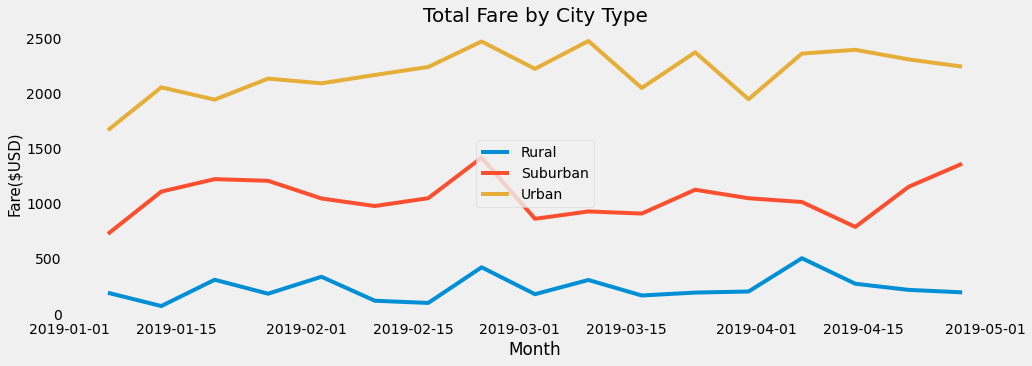

<Figure size 432x288 with 0 Axes>

In [22]:

from matplotlib import style

style.use("fivethirtyeight")

x_labels = ["Rural", "Suburban","Urban"]
plt.subplots(figsize = (15,5))
plt.plot(date_df, label = x_labels)
plt.legend(loc = "center")
plt.title("Total Fare by City Type", fontsize= 20)
plt.ylabel("Fare($USD)", fontsize = 15)
plt.xlabel("Month")
#plt.xticks()
plt.grid()




plt.show()
plt.tight_layout()

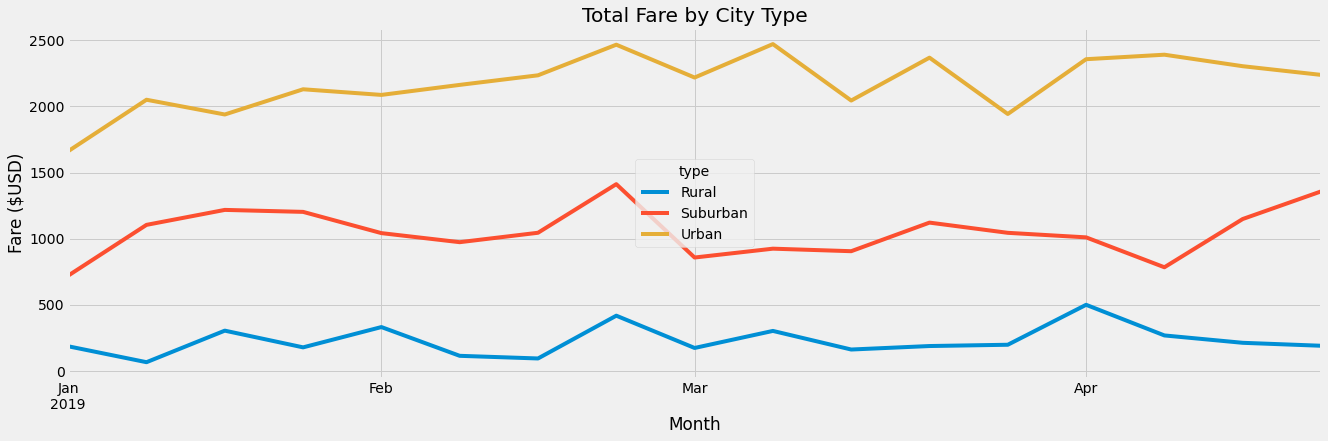

In [23]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = date_df.plot(figsize = (20,6))
# Add a title 
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()

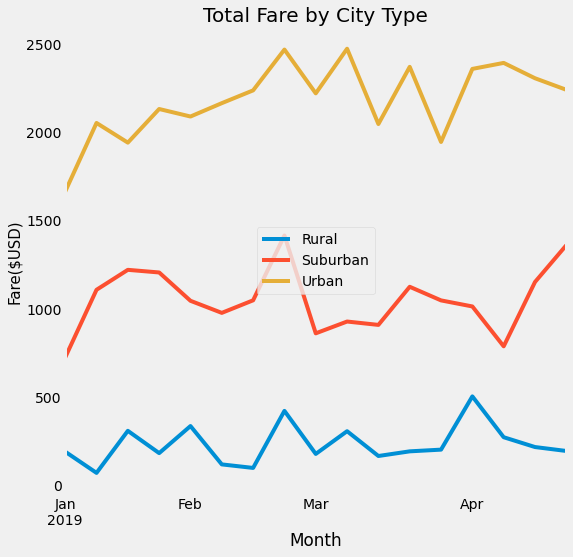

In [24]:
from matplotlib import style

style.use("fivethirtyeight")

x_labels = ["Rural", "Suburban","Urban"]
#fig, ax = plt.subplots(figsize = (8,8))
ax = date_df.plot(figsize = (8,8))
#ax.plot(date_df, label = x_labels)
ax.legend(loc = "center")
ax.set_title("Total Fare by City Type", fontsize= 20)
ax.set_ylabel("Fare($USD)", fontsize = 15)
ax.set_xlabel("Month")

#plt.xticks()
plt.grid()




plt.show()